In [118]:
import numpy as np
import pandas as pd 

In [119]:
from sklearn.datasets import load_iris

In [120]:
iris = load_iris()
df=pd.DataFrame(iris.data)

In [121]:
df.columns=iris.feature_names
df['Target']=iris.target

In [122]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [123]:
new_df = df[df['Target'] != 0][['sepal width (cm)','petal length (cm)','Target']]

In [124]:
new_df.head()

,sepal width (cm),petal length (cm),Target
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

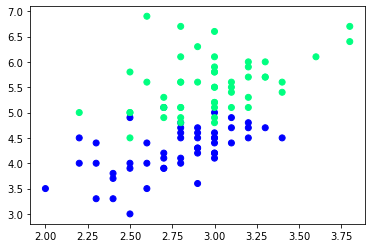

In [126]:
plt.scatter(new_df['sepal width (cm)'],new_df['petal length (cm)'],c=new_df['Target'],cmap='winter')

In [127]:
new_df.shape

(100, 3)

In [153]:
# Taking only 10 rows for training
df_train = new_df.iloc[:60,:].sample(10)
df_val = new_df.iloc[60:80,:].sample(5)
df_test = new_df.iloc[80:,:].sample(5)

In [154]:
df_train

,sepal width (cm),petal length (cm),Target
62,2.2,4.0,1
72,2.5,4.9,1
66,3.0,4.5,1
93,2.3,3.3,1
81,2.4,3.7,1
86,3.1,4.7,1
101,2.7,5.1,2
79,2.6,3.5,1
65,3.1,4.4,1
102,3.0,5.9,2


In [155]:
df_val

,sepal width (cm),petal length (cm),Target
115,3.2,5.3,2
125,3.2,6.0,2
124,3.3,5.7,2
126,2.8,4.8,2
116,3.0,5.5,2


In [156]:
df_test

,sepal width (cm),petal length (cm),Target
148,3.4,5.4,2
137,3.1,5.5,2
149,3.0,5.1,2
146,2.5,5.0,2
135,3.0,6.1,2


In [157]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [158]:
y_test

array([2, 2, 2, 2, 2])

## class1 Bagging

In [159]:
# Data for Tree 1
# with replacement
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal width (cm),petal length (cm),Target
62,2.2,4.0,1
101,2.7,5.1,2
86,3.1,4.7,1
81,2.4,3.7,1
86,3.1,4.7,1
93,2.3,3.3,1
62,2.2,4.0,1
72,2.5,4.9,1


In [160]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [161]:
dt_bag1 = DecisionTreeClassifier()

In [162]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print("accuracy score",accuracy_score(y_test,y_pred))

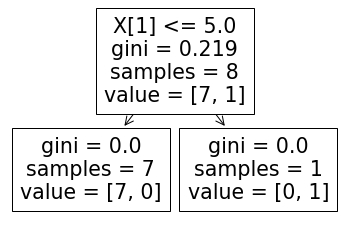

accuracy score 0.8


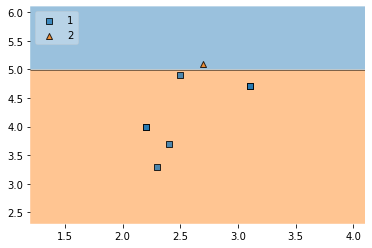

In [163]:
evaluate(dt_bag1,X,y)

In [164]:
# Data for Tree 2
# with replacement
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal width (cm),petal length (cm),Target
65,3.1,4.4,1
86,3.1,4.7,1
81,2.4,3.7,1
65,3.1,4.4,1
72,2.5,4.9,1
102,3.0,5.9,2
101,2.7,5.1,2
62,2.2,4.0,1


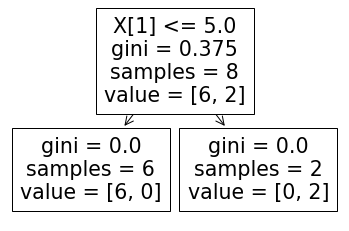

accuracy score 0.8


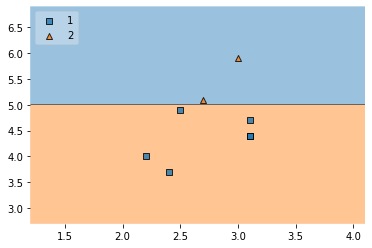

In [165]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [166]:
# Data for Tree 3
# with replacement
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal width (cm),petal length (cm),Target
79,2.6,3.5,1
101,2.7,5.1,2
86,3.1,4.7,1
86,3.1,4.7,1
101,2.7,5.1,2
66,3.0,4.5,1
81,2.4,3.7,1
93,2.3,3.3,1


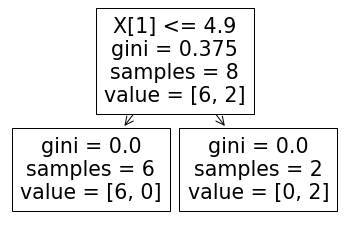

accuracy score 0.8


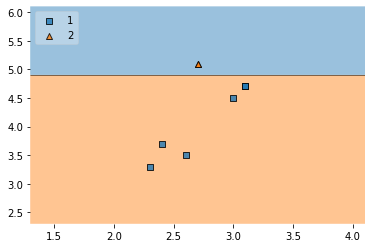

In [167]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

### PREDICT

In [173]:
df_test

,sepal width (cm),petal length (cm),Target
148,3.4,5.4,2
137,3.1,5.5,2
149,3.0,5.1,2
146,2.5,5.0,2
135,3.0,6.1,2


In [175]:
print("Predictor 1",dt_bag1.predict(np.array([3.4,5.4]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([3.4,5.4]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([3.4,5.4]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


### Pasting

In [176]:
# Row sampling without replacement
df_train

,sepal width (cm),petal length (cm),Target
62,2.2,4.0,1
72,2.5,4.9,1
66,3.0,4.5,1
93,2.3,3.3,1
81,2.4,3.7,1
86,3.1,4.7,1
101,2.7,5.1,2
79,2.6,3.5,1
65,3.1,4.4,1
102,3.0,5.9,2


In [177]:
df_train.sample(8)

,sepal width (cm),petal length (cm),Target
86,3.1,4.7,1
93,2.3,3.3,1
102,3.0,5.9,2
72,2.5,4.9,1
65,3.1,4.4,1
81,2.4,3.7,1
66,3.0,4.5,1
79,2.6,3.5,1


### Random Subspaces

In [178]:
df1 = df.sample(10)

In [179]:
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
118,7.7,2.6,6.9,2.3,2
12,4.8,3.0,1.4,0.1,0
103,6.3,2.9,5.6,1.8,2
36,5.5,3.5,1.3,0.2,0
83,6.0,2.7,5.1,1.6,1
28,5.2,3.4,1.4,0.2,0
87,6.3,2.3,4.4,1.3,1
117,7.7,3.8,6.7,2.2,2
29,4.7,3.2,1.6,0.2,0
42,4.4,3.2,1.3,0.2,0


In [180]:
df1.sample(2,replace=True,axis=1)

,petal length (cm),petal length (cm)
118,6.9,6.9
12,1.4,1.4
103,5.6,5.6
36,1.3,1.3
83,5.1,5.1
28,1.4,1.4
87,4.4,4.4
117,6.7,6.7
29,1.6,1.6
42,1.3,1.3


### Random Patches

In [182]:
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
118,7.7,2.6,6.9,2.3,2
12,4.8,3.0,1.4,0.1,0
103,6.3,2.9,5.6,1.8,2
36,5.5,3.5,1.3,0.2,0
83,6.0,2.7,5.1,1.6,1
28,5.2,3.4,1.4,0.2,0
87,6.3,2.3,4.4,1.3,1
117,7.7,3.8,6.7,2.2,2
29,4.7,3.2,1.6,0.2,0
42,4.4,3.2,1.3,0.2,0


In [183]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,sepal width (cm),sepal length (cm)
36,3.5,5.5
12,3.0,4.8
36,3.5,5.5
117,3.8,7.7
29,3.2,4.7
36,3.5,5.5
87,2.3,6.3
42,3.2,4.4
